#### Preludio

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn.objects as so
from scipy.optimize import curve_fit
from scipy.signal import find_peaks
import sympy as sp
import ipywidgets as iwy

difraccion = lambda p, a, b, p0: 1 / ((a / (p0 - p)**2) + b)**0.5

difraccion_a = lambda p, a, b, p0: -a/((p - p0)**2*(a**2/(p - p0)**2 + b**2)**1.5)
difraccion_b = lambda p, a, b, p0: -b/(a**2/(p - p0)**2 + b**2)**1.5
difraccion_p0 = lambda p, a, b, p0: -a**2/((p - p0)**3*(a**2/(p - p0)**2 + b**2)**1.5)

def propagacion(funcion, x, popt, pcov):
    n_params = funcion.__code__.co_argcount
    params = sp.symbols(funcion.__code__.co_varnames[:n_params])

    funcion_sympy = funcion(*params)

    derivadas = []
    for i in range(1, n_params):
        derivada = sp.lambdify(params, sp.diff(funcion_sympy, params[i]).simplify())
        derivadas.append(derivada(x, *popt))

    error = np.zeros(len(x))
    for i in range(n_params-1):
        for j in range(i, n_params-1):
            error += derivadas[i]*derivadas[j]*pcov[i, j]*(2**(i!=j))

    return error

In [2]:
!pip install -q gdown
from gdown import download_folder
id = '1RxiaM97wqAMcqeJIDaMtz8D_5ibeBQlV'
download_folder(f'https://drive.google.com/drive/folders/{id}', quiet=False, use_cookies=False)

Retrieving folder contents


Processing file 1SuyK-RPyPaa2u71EBTRc5yNp1t9dmdPV calibracion_px_ldo.csv
Processing file 1W8nRApTKLVnrCQxlYRZWsscgAp3lhkN7 pantalla_celu_1.csv
Processing file 1dHhzmxWqQ3J_Nx5sw5JfrOVSCR7S6FtO pantalla_celu_2.csv
Processing file 1qnGC6euw2JsIQJebPD154R0zJMB6ph7Q pantalla_celu_3.csv
Processing file 1xGM2oEreteT5Einexl50sRuxWoQwM_PM pantalla_celu_4.csv
Processing file 1EFABi2M6lEM75clUE2YmG8D5IwVXXA8n pantalla_celu_5.csv
Processing file 1KWNUCRSI3eZogGq9mKdC70ZK_WER4D6H pantalla_celu_varias_conMuestra.csv
Processing file 1C5EF96Le6VCXZh3vEDAhskWx7fQZpkMK pantalla_celu_varias_sinMuestra.csv
Processing file 1A-qTqZsEY2n8Rq3c_o7vaJ4_aNtXMHgx pantalla_espectrometro_1.txt
Processing file 1aIsC60V_8TsxdHGtKrBcjLXWvqNDH4Pq pantalla_espectrometro_2.txt
Processing file 1HcMcXisDozrDLSIVTy7aRmuwWRqnOV0s pantalla_espectrometro_3.txt


Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1SuyK-RPyPaa2u71EBTRc5yNp1t9dmdPV
To: /content/calibracion_long_onda/calibracion_px_ldo.csv
100%|██████████| 114k/114k [00:00<00:00, 71.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1W8nRApTKLVnrCQxlYRZWsscgAp3lhkN7
To: /content/calibracion_long_onda/pantalla_celu_1.csv
100%|██████████| 121k/121k [00:00<00:00, 59.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1dHhzmxWqQ3J_Nx5sw5JfrOVSCR7S6FtO
To: /content/calibracion_long_onda/pantalla_celu_2.csv
100%|██████████| 125k/125k [00:00<00:00, 71.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1qnGC6euw2JsIQJebPD154R0zJMB6ph7Q
To: /content/calibracion_long_onda/pantalla_celu_3.csv
100%|██████████| 130k/130k [00:00<00:00, 77.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1xGM2oEreteT5Einexl50sRuxWoQwM_PM
To: /content/calibracion_long_onda/pan

['/content/calibracion_long_onda/calibracion_px_ldo.csv',
 '/content/calibracion_long_onda/pantalla_celu_1.csv',
 '/content/calibracion_long_onda/pantalla_celu_2.csv',
 '/content/calibracion_long_onda/pantalla_celu_3.csv',
 '/content/calibracion_long_onda/pantalla_celu_4.csv',
 '/content/calibracion_long_onda/pantalla_celu_5.csv',
 '/content/calibracion_long_onda/pantalla_celu_varias_conMuestra.csv',
 '/content/calibracion_long_onda/pantalla_celu_varias_sinMuestra.csv',
 '/content/calibracion_long_onda/pantalla_espectrometro_1.txt',
 '/content/calibracion_long_onda/pantalla_espectrometro_2.txt',
 '/content/calibracion_long_onda/pantalla_espectrometro_3.txt']

#### Visualizacion

In [3]:
def graficar_celular(n_archivo=2):
    df = pd.read_csv(f'./calibracion_long_onda/pantalla_celu_{n_archivo}.csv')
    df['gris promedio'] = df.iloc[:, 1:].mean(axis=1)
    df = df[(df['Nro. de pixel'] >= 800) & (df['Nro. de pixel'] <= 1400)]

    (
        so.Plot(df, 'Nro. de pixel', 'gris promedio')
        .add(so.Line())
        .layout(size=(12, 4))
        .show()
    )

iwy.interact(graficar_celular, n_archivo=(1, 5, 1));

interactive(children=(IntSlider(value=2, description='n_archivo', max=5, min=1), Output()), _dom_classes=('wid…

In [4]:
def graficar_espectrometro(n_archivo=1):
    long_onda, amp = np.loadtxt(f'./calibracion_long_onda/pantalla_espectrometro_{n_archivo}.txt',
                                delimiter=',', unpack=True)

    df = pd.DataFrame({'longitud de onda': long_onda, 'amplitud': amp})
    df = df[(df['longitud de onda'] >= 400) & (df['longitud de onda'] <= 700)]

    (
        so.Plot(df, 'longitud de onda', 'amplitud')
        .add(so.Line())
        .layout(size=(12, 4))
        .show()
    )

iwy.interact(graficar_espectrometro, n_archivo=(1, 3, 1));

interactive(children=(IntSlider(value=1, description='n_archivo', max=3, min=1), Output()), _dom_classes=('wid…

#### Errores celular

In [5]:
# VISUALIZACION
def graficar_mediciones(n_medicion=0):

    # Cargar datos
    data = np.loadtxt(f'./calibracion_long_onda/pantalla_celu_varias_sinMuestra.csv',
                      delimiter=',', unpack=True)

    px = np.arange(0, len(data[0]), 1)
    data_i = data[n_medicion]

    # Sacar peaks
    peaks_mas_peaks, *_ = find_peaks(data_i, prominence=0.1, height=0.28, distance=30)

    data_molesto = data_i[(px >= 478) & (px <= 495)]
    px_molesto = px[(px >= 478) & (px <= 495)]
    peak_molesto, *_ = find_peaks(data_molesto, height=(0.15, 0.19), distance=len(data[0]))

    peaks = np.array([peak_molesto[0] + 478, *peaks_mas_peaks])

    # Grafico
    fig, ax = plt.subplots(figsize=(12,4))
    ax.set_xlabel('Nro. de pixel')
    ax.set_ylabel('Amplitud [u. a.]')

    ax.plot(px, data_i, 'k', label=f'Foto n°{n_medicion+1}')
    ax.plot(px[peaks], data_i[peaks], 'ro', label='Picos')

    # ax.plot(px_molesto, data_molesto, 'b-')
    # ax.plot(px_molesto[peak_molesto], data_molesto[peak_molesto], 'bo')

    # ax.plot(px[peak_molesto + 478], data_i[peak_molesto + 478], 'go', ms=10, zorder=0)

    ax.grid(ls=':')
    ax.legend()
    plt.show()

iwy.interact(graficar_mediciones, n_medicion=(0, 19, 1));

interactive(children=(IntSlider(value=0, description='n_medicion', max=19), Output()), _dom_classes=('widget-i…

In [6]:
# CARGAR DATOS
data = np.loadtxt(f'./calibracion_long_onda/pantalla_celu_varias_sinMuestra.csv',
                      delimiter=',', unpack=True)

px_para_picos = np.zeros((len(data), 5))
for i in range(len(data)):
    px = np.arange(0, len(data[0]), 1)
    data_i = data[i]

    peaks_mas_peaks, *_ = find_peaks(data_i, prominence=0.1, height=0.28, distance=30)

    data_molesto = data_i[(px >= 478) & (px <= 495)]
    px_molesto = px[(px >= 478) & (px <= 495)]
    peak_molesto, *_ = find_peaks(data_molesto, height=(0.15, 0.19), distance=len(data[0]))

    peaks = np.array([peak_molesto[0] + 478, *peaks_mas_peaks])

    px_para_picos[i] = px[peaks]

for media, error in zip(np.mean(px_para_picos, axis=0), np.std(px_para_picos, axis=0, ddof=1)):
    print(f'Hay un pico en el pixel {media:.2f} ± {error:.2f}')

Hay un pico en el pixel 485.95 ± 2.56
Hay un pico en el pixel 519.75 ± 2.24
Hay un pico en el pixel 557.65 ± 3.03
Hay un pico en el pixel 714.75 ± 5.97
Hay un pico en el pixel 874.45 ± 3.33


Guardar? (y/n) 


/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:218: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:207: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/usr/local/lib/python3.11/dist-packages/scipy/stats/_distn_infrastructure.py:2046: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


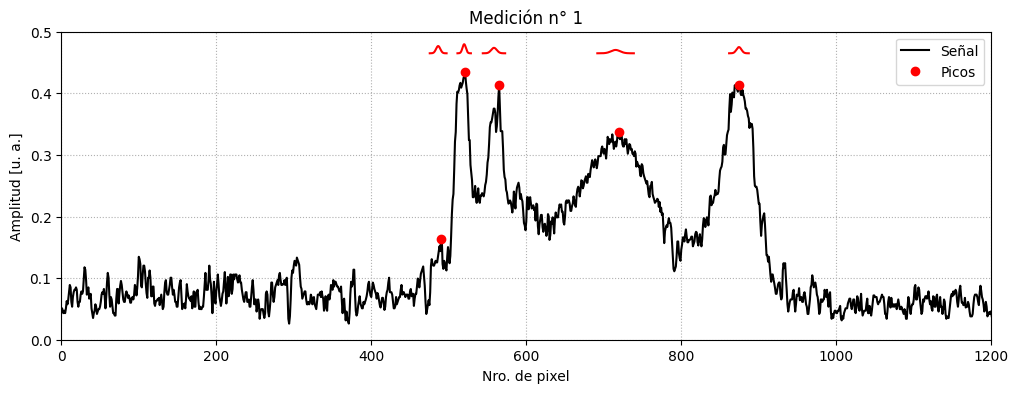

In [7]:
# BORRAR ESTA CELDA DESPUES
from matplotlib.animation import FuncAnimation
from matplotlib import animation, rc
from IPython.display import HTML
rc('animation', html='html5');
from scipy.stats import norm

# Cargar datos fuera de la función para eficiencia
data = np.loadtxt('./calibracion_long_onda/pantalla_celu_varias_sinMuestra.csv',
                  delimiter=',', unpack=True)
px = np.arange(0, len(data[0]), 1)
n_total = len(data)

# Crear figura
fig, ax = plt.subplots(figsize=(12, 4))
line, = ax.plot([], [], 'k', label='Señal')
points, = ax.plot([], [], 'ro', label='Picos')

gaussiana1, = ax.plot([], [], 'r-')
gaussiana2, = ax.plot([], [], 'r-')
gaussiana3, = ax.plot([], [], 'r-')
gaussiana4, = ax.plot([], [], 'r-')
gaussiana5, = ax.plot([], [], 'r-')
gaussianas = [gaussiana1, gaussiana2, gaussiana3, gaussiana4, gaussiana5]

title = ax.set_title('')
ax.set_xlabel('Nro. de pixel')
ax.set_ylabel('Amplitud [u. a.]')
ax.grid(ls=':')
ax.legend()
ax.set_xlim(0, 1200)
ax.set_ylim(0, 0.5)

# def init():
#     line.set_data([], [])
#     points.set_data([], [])
#     return line, points, title

pixeles = []
def update(n_medicion):
    global pixeles
    data_i = data[n_medicion]
    line.set_data(px, data_i)

    # Encontrar picos
    peaks_mas_peaks, *_ = find_peaks(data_i, prominence=0.1, height=0.28, distance=30)
    data_molesto = data_i[(px >= 478) & (px <= 495)]
    peak_molesto, *_ = find_peaks(data_molesto, height=(0.15, 0.19), distance=len(data[0]))
    peaks = np.array([peak_molesto[0] + 478, *peaks_mas_peaks]) if len(peak_molesto) > 0 else peaks_mas_peaks

    points.set_data(px[peaks], data_i[peaks])
    title.set_text(f'Medición n° {n_medicion+1}')

    # ax.plot(px[peaks], [0.47]*len(peaks), 'r.', alpha=0.3)
    pixeles.append(px[peaks])
    for i in range(len(gaussianas)):
        loc = np.mean(pixeles, axis=0)[i]
        scale = np.std(pixeles, ddof=1, axis=0)[i]
        equis = np.linspace(loc - 4*scale, loc + 4*scale, 500)
        gaussianas[i].set_data(equis, norm.pdf(equis, loc=loc, scale=scale)*0.08 + 0.465)
    # return line, points, title

# ani = FuncAnimation(fig, update, frames=n_total, init_func=init,
#                     interval=500, repeat=True)
ani = FuncAnimation(fig, update, frames=n_total,
                    interval=500, repeat=True)

if False:
    !apt-get install imagemagick
    ani.save("animacion.gif", writer="imagemagick", fps=2)
    from google.colab import files
    files.download("animacion.gif")
ani

#### Calibracion pixel a longitud de onda

,Nro. de pixel,R_blanco,G_blanco,B_blanco,R_muestra,G_muestra,B_muestra
0,0.000000,0.079529,0.044549,0.062588,0.082353,0.045961,0.063686
1,1.002102,0.082353,0.047373,0.065412,0.081569,0.045176,0.062902
2,2.004204,0.088314,0.053804,0.071373,0.083137,0.046275,0.064157
3,3.006306,0.090353,0.055843,0.073412,0.085961,0.049098,0.066980
4,4.008408,0.084863,0.050980,0.068078,0.085647,0.049098,0.067137
...,...,...,...,...,...,...,...
1467,1470.083700,0.052235,0.030275,0.037647,0.051451,0.029176,0.036392
1468,1471.085800,0.051922,0.029176,0.038588,0.051608,0.029333,0.037490
1469,1472.087900,0.051922,0.029176,0.038588,0.050980,0.028706,0.036863
1470,1473.090100,0.051451,0.028706,0.038745,0.050510,0.028549,0.036549


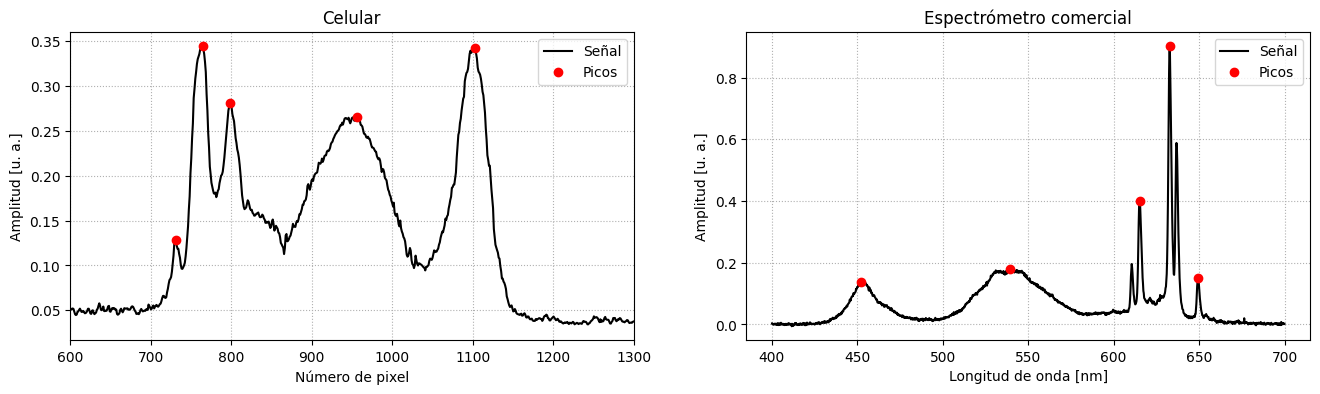

[ 730  763  797  954 1101]


In [8]:
# DATOS
df_c = pd.read_csv('./calibracion_long_onda/calibracion_px_ldo.csv', skiprows=3,
                   names=['Nro. de pixel','R_blanco','G_blanco','B_blanco','R_muestra','G_muestra','B_muestra'])
display(df_c)
df_c['gris promedio'] = df_c.iloc[:, 1:].mean(axis=1)

px_c = df_c['Nro. de pixel']  # celular
a_c = df_c['gris promedio']


l_e, a_e = np.loadtxt('./calibracion_long_onda/pantalla_espectrometro_1.txt',
                      delimiter=',', unpack=True)  # Espectrofotometro

# a_e = a_e[(l_e >= 600) & (l_e <= 660)]  # Solo picos rojos
# l_e = l_e[(l_e >= 600) & (l_e <= 660)]

a_e = a_e[(l_e >= 400) & (l_e <= 700)]  # Todos los picos
l_e = l_e[(l_e >= 400) & (l_e <= 700)]

# PICOS
# peaks_c, *_ = find_peaks(a_c, prominence=0.05)
peaks_c, *_ = find_peaks(a_c, prominence=0.02, height=0.1)
# peaks_e, *_ = find_peaks(a_e, prominence=0.12)  # Solo picos rojos
peaks_e, *_ = find_peaks(a_e, prominence=0.12, distance=50)  # Todos los picos

# GRAFICO
fig, ax = plt.subplots(1, 2, figsize=(16,4))

ax[0].plot(px_c, a_c, 'k', label='Señal')
ax[0].plot(px_c[peaks_c], a_c[peaks_c], 'or', label='Picos')
ax[0].set_xlabel('Número de pixel')
ax[0].set_title('Celular')
ax[0].set_xlim(600, 1300)

ax[1].plot(l_e, a_e, 'k', label='Señal')
ax[1].plot(l_e[peaks_e], a_e[peaks_e], 'or', label='Picos')
ax[1].set_xlabel('Longitud de onda [nm]')
ax[1].set_title('Espectrómetro comercial')

for ax_i in ax:
    ax_i.grid(ls=':')
    ax_i.legend()
    ax_i.set_ylabel('Amplitud [u. a.]')
plt.show()

print(peaks_c)

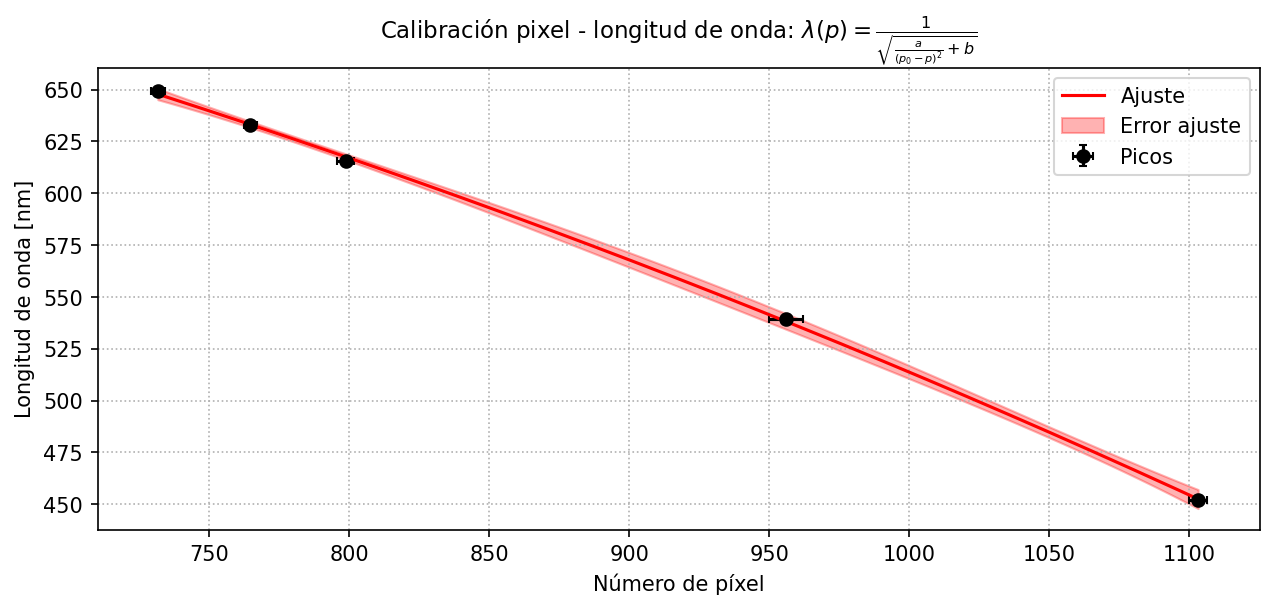

In [9]:
# AJUSTE
picos_celu = px_c[peaks_c][::-1]
picos_espec = l_e[peaks_e]

popt, pcov = curve_fit(difraccion, picos_celu, picos_espec, maxfev=1000000,
                       p0=[1.26777218, 6.78704522e-13, 2e3])

# GRAFICO
fig, ax = plt.subplots(figsize=(10, 4), dpi=150)
ax.set_title(r'Calibración pixel - longitud de onda: $\lambda(p) = \frac{1}{\sqrt{\frac{a}{(p_0 - p)^2} + b}}$', fontsize=11)
ax.set_xlabel('Número de píxel')
ax.set_ylabel('Longitud de onda [nm]')

# ax.plot(picos_celu, picos_espec, 'ok')
ax.errorbar(picos_celu, picos_espec, yerr=[1]*len(picos_celu),
            xerr=np.std(px_para_picos, axis=0, ddof=1)[::-1],
            fmt='ok', label='Picos', capsize=2, capthick=1)

xfino = np.linspace(np.min(picos_celu), np.max(picos_celu), 1000)
# xfino = np.linspace(300, 2900, 1000)
yfino = difraccion(xfino, *popt)
ax.plot(xfino, yfino, 'r-', label='Ajuste')
errores = propagacion(difraccion, xfino, popt, pcov)
ax.fill_between(xfino, yfino-errores, yfino+errores, color='r', alpha=0.3, label='Error ajuste')

ax.grid(ls=':')
ax.legend()
plt.show()

In [14]:
print([1]*len(picos_celu))
print(np.std(px_para_picos, axis=0, ddof=1)[::-1])

[1, 1, 1, 1, 1]
[3.33206116 5.97252481 3.03098039 2.24487721 2.56443284]


,Nro. de pixel,R_blanco,G_blanco,B_blanco,R_muestra,G_muestra,B_muestra
0,0.000000,0.079529,0.044549,0.062588,0.082353,0.045961,0.063686
1,1.002102,0.082353,0.047373,0.065412,0.081569,0.045176,0.062902
2,2.004204,0.088314,0.053804,0.071373,0.083137,0.046275,0.064157
3,3.006306,0.090353,0.055843,0.073412,0.085961,0.049098,0.066980
4,4.008408,0.084863,0.050980,0.068078,0.085647,0.049098,0.067137
...,...,...,...,...,...,...,...
1467,1470.083700,0.052235,0.030275,0.037647,0.051451,0.029176,0.036392
1468,1471.085800,0.051922,0.029176,0.038588,0.051608,0.029333,0.037490
1469,1472.087900,0.051922,0.029176,0.038588,0.050980,0.028706,0.036863
1470,1473.090100,0.051451,0.028706,0.038745,0.050510,0.028549,0.036549


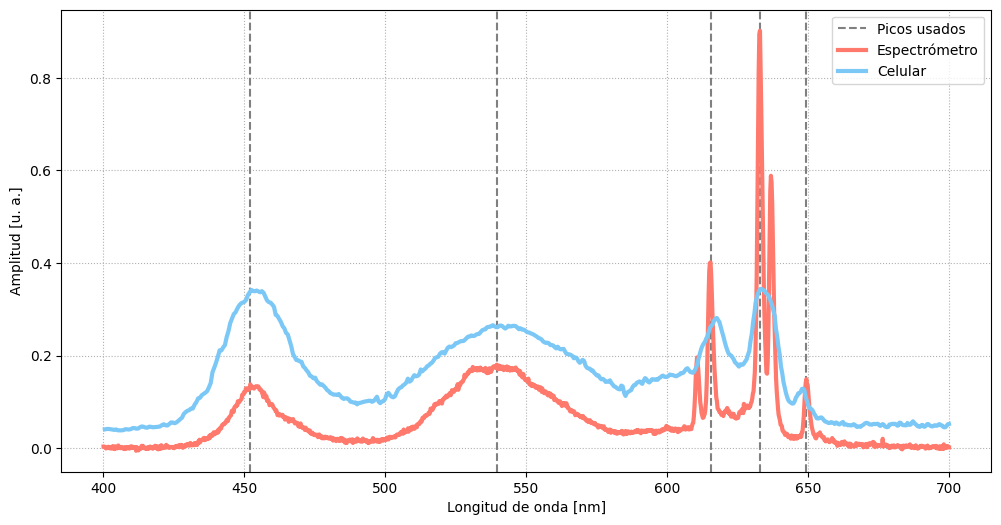

In [11]:
# DATOS
df_c = pd.read_csv('./calibracion_long_onda/calibracion_px_ldo.csv', skiprows=3,
                   names=['Nro. de pixel','R_blanco','G_blanco','B_blanco','R_muestra','G_muestra','B_muestra'])
display(df_c)
df_c['gris promedio'] = df_c.iloc[:, 1:].mean(axis=1)

df_c['longitud de onda'] = difraccion(df_c['Nro. de pixel'].to_numpy(), *popt)
df_c = df_c[(df_c['longitud de onda'] >= 400) & (df_c['longitud de onda'] <= 700)]
px_c = df_c['longitud de onda'].to_numpy()
a_c = df_c['gris promedio']


l_e, a_e = np.loadtxt('./calibracion_long_onda/pantalla_espectrometro_1.txt',
                      delimiter=',', unpack=True)  # Espectrofotometro

# a_e = a_e[(l_e >= 600) & (l_e <= 660)]  # Solo picos rojos
# l_e = l_e[(l_e >= 600) & (l_e <= 660)]

a_e = a_e[(l_e >= 400) & (l_e <= 700)]  # Todos los picos
l_e = l_e[(l_e >= 400) & (l_e <= 700)]

# PICOS
# peaks_c, *_ = find_peaks(a_c, prominence=0.05)
peaks_c, *_ = find_peaks(a_c, prominence=0.02, height=0.1)
# peaks_e, *_ = find_peaks(a_e, prominence=0.12)  # Solo picos rojos
peaks_e, *_ = find_peaks(a_e, prominence=0.12, distance=50)  # Todos los picos

# GRAFICO
fig, ax = plt.subplots(figsize=(12,6))
for linea in l_e[peaks_e]:
    if linea == l_e[peaks_e][0]:
        ax.axvline(linea, color='grey', ls='--', label='Picos usados')
    else:
        ax.axvline(linea, color='grey', ls='--')

ax.plot(l_e, a_e, c='xkcd:salmon', lw=3, label='Espectrómetro')
# ax.plot(l_e[peaks_e], a_e[peaks_e], 'or', label='Picos')

ax.plot(px_c, a_c, c='xkcd:lightblue', lw=3, label='Celular')
# ax.plot(px_c[peaks_c], a_c[peaks_c], 'or', label='Picos')

ax.set_xlabel('Longitud de onda [nm]')
ax.set_ylabel('Amplitud [u. a.]')
ax.grid(ls=':')
ax.legend()

plt.show()

,Nro. de pixel,R_blanco,G_blanco,B_blanco,R_muestra,G_muestra,B_muestra,gris promedio,longitud de onda
0,0.000000,0.079529,0.044549,0.062588,0.082353,0.045961,0.063686,0.063111,867.067334
1,1.002102,0.082353,0.047373,0.065412,0.081569,0.045176,0.062902,0.064131,866.871146
2,2.004204,0.088314,0.053804,0.071373,0.083137,0.046275,0.064157,0.067843,866.674746
3,3.006306,0.090353,0.055843,0.073412,0.085961,0.049098,0.066980,0.070275,866.478134
4,4.008408,0.084863,0.050980,0.068078,0.085647,0.049098,0.067137,0.067634,866.281310
...,...,...,...,...,...,...,...,...,...
1467,1470.083700,0.052235,0.030275,0.037647,0.051451,0.029176,0.036392,0.039529,193.909270
1468,1471.085800,0.051922,0.029176,0.038588,0.051608,0.029333,0.037490,0.039686,193.129725
1469,1472.087900,0.051922,0.029176,0.038588,0.050980,0.028706,0.036863,0.039373,192.349883
1470,1473.090100,0.051451,0.028706,0.038745,0.050510,0.028549,0.036549,0.039085,191.569668


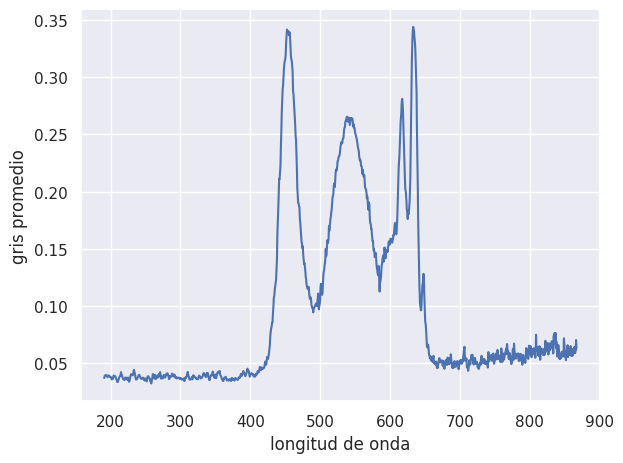

In [12]:
def prueba():
    df = pd.read_csv('./calibracion_long_onda/calibracion_px_ldo.csv', skiprows=3,
                   names=['Nro. de pixel','R_blanco','G_blanco','B_blanco','R_muestra','G_muestra','B_muestra'])
    # df = df[df['Nro. de pixel'] >= popt[-1]]
    df['gris promedio'] = df.iloc[:, 1:].mean(axis=1)
    df['longitud de onda'] = difraccion(np.array(df['Nro. de pixel']), *popt)
    # df['longitud de onda'] = difraccion(np.array(list(range(int(np.array(df['Nro. de pixel'])[-1])+1))), *popt)

    display(df)

    # x = 'Nro. de pixel'
    x = 'longitud de onda'

    (
        so.Plot(df)
        .add(so.Line(), x=x, y='gris promedio')
        # .limit(x=(400, 700))
        .show()
    )

prueba()